In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import json

from vega_datasets import data
sf= data.sf_temps()

## San Francisco Weather

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#Sort Index
df = sf.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


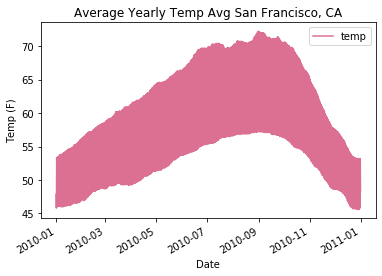

In [3]:
# Visualize Data
df.plot(color='palevioletred')
plt.title("Average Yearly Temp Avg San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

Write the code necessary to visualize the minimum temperature over time.

In [4]:
# 1st Step Sort Index
df = sf.set_index('date').sort_index()
# Sorting by min_value ** Remove Reset Index in order to resample **
d = {'min':'min_value'}
df = df.groupby('date')['temp'].agg([min]).rename(columns=d)
# Resample by month
min_temp_df = df.resample('M').min()
min_temp_df.head()

,min_value
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4


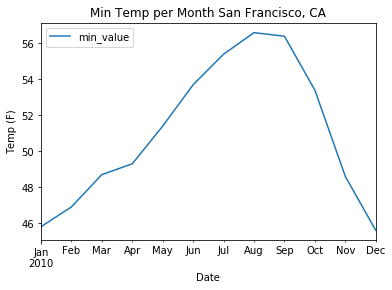

In [5]:
# Visualize Min Temps
min_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Min Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

Write the code necessary to visualize the maximum temperature over time.

In [6]:
# Sort Index
df = sf.set_index('date').sort_index()
# Sorting by max_value ** Remove Reset Index in order to resample **
d = {'max':'max_value'}
df = df.groupby('date')['temp'].agg([max]).rename(columns=d)
# Resample by month
max_temp_df = df.resample('M').max()
max_temp_df.head()

,max_value
date,
2010-01-31,56.2
2010-02-28,58.6
2010-03-31,61.3
2010-04-30,64.3
2010-05-31,66.4


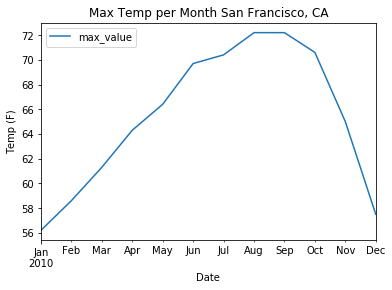

In [7]:
# Visualize Min Temps
max_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Max Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

Which month is the coldest, on average?

In [8]:
# Sort Index
df = sf.set_index('date').sort_index()
# Resample
monthly_temps = df.resample('M')
#  Groupby date to fin min temp
coldest_month = monthly_temps.mean().idxmin()[0]
coldest_month = coldest_month.strftime('%B')
print(f'{coldest_month} was the coldest month on average.')

January was the coldest month on average.


Which month has the highest average temperature?

In [9]:
# Sort Index
df = sf.set_index('date').sort_index()
# Resample
monthly_temps = df.resample('M')
#  Groupby date to fin min temp
warmest_month = monthly_temps.mean().idxmax()[0]
warmest_month = warmest_month.strftime('%B')
print(f'{warmest_month} was the warmest month on average.')

September was the warmest month on average.


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [10]:
# Sort Index
df = sf.set_index('date').sort_index()
# Resample for min/mad of Day
df = df.resample('D')['temp'].agg(['min', 'max'])
# Create variability Column
df['variability'] = (df['max'] - df['min'])
# Resample
df = df.resample('M')['variability'].agg(['max'])
max_vari = df.idxmax()[0]
max_vari = max_vari.strftime('%B')
print(f'{max_vari} had the greatest monthly variability.')

August had the greatest monthly variability.


Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines

In [11]:
# Sort Index
df = sf.set_index('date').sort_index()
# Sorting by max_value ** Remove Reset Index in order to resample **
#d = {'mean':'mean_value'}
#df = df.groupby('date')['temp'].agg([mean]).rename(columns=d)
# Resample by Day
mean_temp_df = df.resample('D').mean()

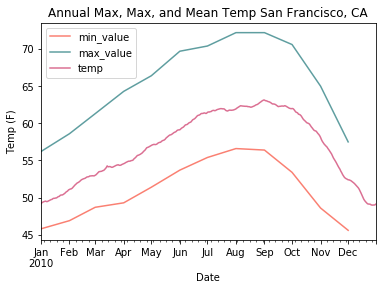

In [12]:
ax = plt.gca()

min_temp_df.plot(color= 'salmon', ax=ax)
max_temp_df.plot(color='cadetblue', ax=ax)
mean_temp_df.plot(color ='palevioletred', ax=ax)
plt.title("Annual Max, Max, and Mean Temp San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

## Seattle Weather

In [13]:
from vega_datasets import data
seattle= data.seattle_weather()

Use the dataset to answer the following questions:

Which year and month combination has the highest amount of precipitation?

In [21]:
# Sort Index
df = seattle.set_index('date').sort_index()
# Aggregate the month
df = df.resample('M')['precipitation'].agg(['sum'])
df.head()

,sum
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


Visualize the amount of monthly precipitation over time.

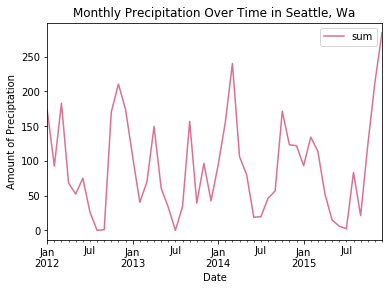

In [23]:
df.plot(color="palevioletred")
plt.title("Monthly Precipitation Over Time in Seattle, Wa")
plt.xlabel('Date')
plt.ylabel('Amount of Preciptation')
plt.show()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

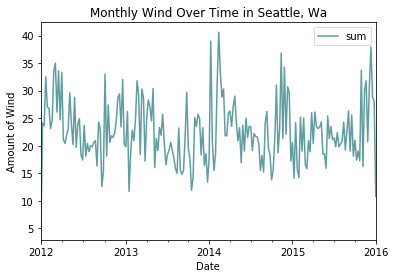

In [28]:
# Sort Index
df = seattle.set_index('date').sort_index()
# Aggregate by month
df = df.resample('W')['wind'].agg(['sum'])
df.plot(color="cadetblue")
plt.title("Monthly Wind Over Time in Seattle, Wa")
plt.xlabel('Date')
plt.ylabel('Amount of Wind')
plt.show()

Which year-month combination is the windiest?

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?

## Flights

In [14]:
flights= data.flights_20k()

Convert any negative delays to 0.

In [15]:
flights['delay'] = flights['delay'].clip(lower=0)
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


Which hour of the day has the highest average delay?

In [16]:
# Sort Index
df = flights.set_index('date').sort_index()
# Resample for hour count rain = max
df.resample('H')['delay'].agg(['max']).idxmax()

max   2001-02-09 13:00:00
dtype: datetime64[ns]

Does the day of the week make a difference in the delay amount?

In [17]:
# Add a weekday column
flights['weekday'] = flights.date.dt.day_name()
# Sort Index
df = flights.set_index('date').sort_index()
df.head(1)

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday


In [18]:
# Resample for hour count rain = max
df.groupby(['weekday']).sum()

,delay,distance
weekday,,
Friday,53770,1517386
Monday,21354,1504996
Saturday,19755,1290733
Sunday,27221,1327880
Thursday,38605,1460862
Tuesday,27715,1460784
Wednesday,33969,1542607


Does the month make a difference in the delay amount?

In [19]:
# Sort Index
df = flights.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday
2001-01-01 06:30:00,0,251,MDW,STL,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,Monday


In [20]:
# Resample for hour count rain = max
df.resample('M')['delay'].agg(['max'])

,max
date,
2001-01-31,333
2001-02-28,509
2001-03-31,391
